In [1]:
# Add relevant Jupyter notebook extensions 

In [ ]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

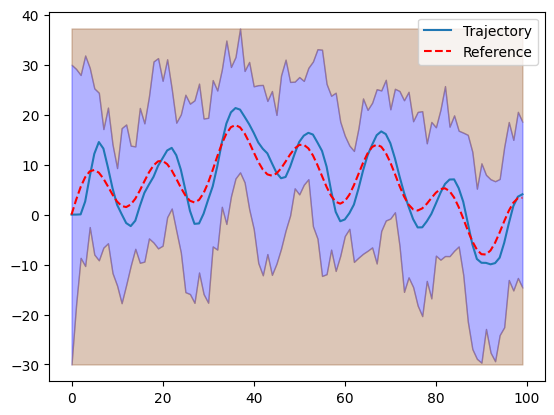

In [48]:
# Import relevant modules
from dynamic import Submarine, ClosedLoop, Mission
from control import Controller

# Instantiate the submarine
sub = Submarine()

# Instantiate the PD Controller with given gains
controller = Controller(Kp=0.15, Kd=0.6)
# Instantiate your controller (depending on your implementation)
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv(r"C:\Users\abdul\Desktop\B1\Scientific Coding\b1-coding-practical-mt24\data\mission.csv") 

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

Best Kp: 0.1, Best Kd: 0.8, Lowest Error: 8.814069453227448


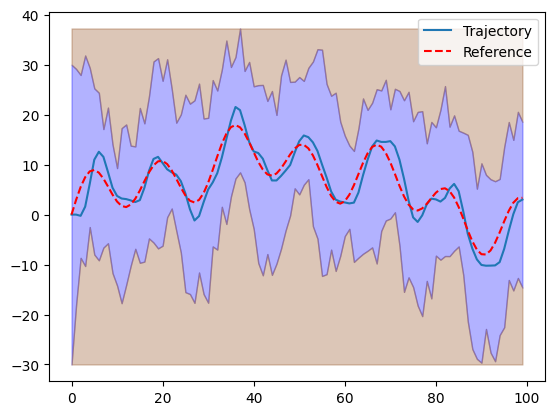

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from dynamic import Submarine, ClosedLoop, Mission
from control import Controller

# Define an error function to calculate the Mean Squared Error between reference and trajectory
def calculate_mse(reference, trajectory):
    # Assuming reference and trajectory have the same length
    return np.mean((reference - trajectory) ** 2)

# Define the function to perform grid search for Kp and Kd
def find_best_gains(mission, kp_values, kd_values):
    best_kp = None
    best_kd = None
    lowest_error = float('inf')
    
    for kp in kp_values:
        for kd in kd_values:
            # Create a new controller with the current Kp and Kd values
            controller = Controller(Kp=kp, Kd=kd)
            
            # Set up the closed-loop simulation
            submarine = Submarine()
            closed_loop = ClosedLoop(submarine, controller)
            
            # Run the simulation
            trajectory = closed_loop.simulate_with_random_disturbances(mission)
            
            # Calculate the error between the reference and the simulated trajectory
            mse = calculate_mse(mission.reference, trajectory.position[:, 1])
            
            # Check if the current error is the lowest
            if mse < lowest_error:
                best_kp = kp
                best_kd = kd
                lowest_error = mse
                
    return best_kp, best_kd, lowest_error

# Load the mission from the CSV file
mission = Mission.from_csv(r"C:\Users\abdul\Desktop\B1\Scientific Coding\b1-coding-practical-mt24\data\mission.csv")

# Define the range of Kp and Kd values to search through
kp_values = np.linspace(0.1, 1.0, 10)
kd_values = np.linspace(0.1, 1.0, 10)

# Find the best Kp and Kd values
best_kp, best_kd, lowest_error = find_best_gains(mission, kp_values, kd_values)

print(f"Best Kp: {best_kp}, Best Kd: {best_kd}, Lowest Error: {lowest_error}")

# Plot the best trajectory
controller = Controller(Kp=best_kp, Kd=best_kd)
submarine = Submarine()
closed_loop = ClosedLoop(submarine, controller)
best_trajectory = closed_loop.simulate_with_random_disturbances(mission)

best_trajectory.plot_completed_mission(mission)
